# Table of Contents
 <p><div class="lev1 toc-item"><a href="#非線形最小2乗法の原理" data-toc-modified-id="非線形最小2乗法の原理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>非線形最小2乗法の原理</a></div><div class="lev1 toc-item"><a href="#具体的な手順" data-toc-modified-id="具体的な手順-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>具体的な手順</a></div><div class="lev1 toc-item"><a href="#Mapleによる解法の指針" data-toc-modified-id="Mapleによる解法の指針-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mapleによる解法の指針</a></div><div class="lev1 toc-item"><a href="#python-code" data-toc-modified-id="python-code-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>python code</a></div><div class="lev1 toc-item"><a href="#Gauss-Newton法に関するメモ" data-toc-modified-id="Gauss-Newton法に関するメモ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gauss-Newton法に関するメモ</a></div><div class="lev1 toc-item"><a href="#課題" data-toc-modified-id="課題-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>課題</a></div><div class="lev1 toc-item"><a href="#解答例" data-toc-modified-id="解答例-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>解答例</a></div>

<br />

<div style="text-align: center;">
<font size="7">非線形最小2乗法(NonLinearFit)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/nonlinearfit</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017 </font>
</div>


# 非線形最小2乗法の原理



前章では，データに近似的にフィットする最小二乗法を紹介した．ここでは，フィット式が多項式のような線形関係にない関数の最小二乗法を紹介する．図のようなデータにフィットする場合を考えよう．

![C9_NonLinearFitplot2d1.png](figs/C9_NonLinearFitplot2d1.png)

このデータにあてはめるのはローレンツ関数，

$$
F \left(x;\mathbf{a} \right)=a _{1}+ \frac{a _{2}}{a _{3}+\left(x -a _{4}\right)^{2}}
$$
である．この関数の特徴は，今まで見てきた関数と違いパラメータが線形関係になっていない．誤差関数は，いままでと同様に

$$
\chi ^{2}\left(\mathbf{a} \right)={\sum_i^N }d _{i }^{2}=\sum_i^N \left(F \left(x _{i };a \right)-y _{i }\right)^{2}
$$
で，$a={a_0, a_1,..}$をパラメータとして変えた時に最小となる値を求める点もかわらない．しかし，線形の最小二乗法のように微分しても一元の方程式にならず，連立方程式を単に解くだけでは求まらない．

そこで図のような2次関数の最小値を求める場合を考える．最小値の点$a_0$のまわりで，Taylor展開すると，$\mathbf{d,D}$をそれぞれの係数とすると，

$$
\chi^2 \left( \mathbf{a} \right)= \chi^2 \left( \mathbf{a_0}  \right) - \mathbf{d} \left(\mathbf{a}-\mathbf{a_0} \right) +\frac{1}{2} \mathbf{D} \left(\mathbf{a}-\mathbf{a_0} \right)^{2}
$$
である．最小の点$a_0$は，微分が$0$になるので，

$$
\mathbf{a _{0}}=\mathbf{a} + \mathbf{D} ^{-1} \times (-\mathbf{d})
$$
と予測される．図を参照して上の式を導け．またその意味を考察せよ．

![C9_NonLinearFitplot2d2.png](figs/C9_NonLinearFitplot2d2.png)
![C9_NonLinearFitplot2d3.png](figs/C9_NonLinearFitplot2d3.png)


現実には高次項の影響で計算通りにはいかず，単に最小値の近似値を求めるだけである．これは，$ \chi \left(\mathbf{a} \right)  ^{2}$の微分関数の解をNewton法で求める操作に対応する．つまり，この操作を何度も繰り返せばいずれ解がある精度で求まるはず．





# 具体的な手順




パラメータの初期値を

$$
a_{{0}}+\Delta\,a,\,b_{{0}}+\Delta\,b,\,c_{{0}}+\Delta\,c,\,d_{{0}}+\Delta\,d
$$
とする．このとき関数$f$を真値$a_0, b_0, c_0, d_0$のまわりでテイラー展開し，高次項を無視すると

$$
\Delta\,f=f \left( a_{{0}}+\Delta\,a_{{1}},b_{{0}}+\Delta\,b_{{1}},c_{{0}}+\Delta\,c_{{1}},d_{{0}}+\Delta\,d_{{1}} \right) -f \left( a_{{0}},b_{{0}},c_{{0}},d_{{0}} \right)
$$


$$
=\left(\frac{\partial }{\partial a }f \right)_{0}\Delta a _{1}+\left(\frac{\partial }{\partial b }f \right)_{0}\Delta b _{1}+\left(\frac{\partial }{\partial c }f \right)_{0}\Delta c _{1}+\left(\frac{\partial }{\partial d }f \right)_{0}\Delta d _{1}
$$
となる．

課題でつくったデータはt = 1からt = 256までの時刻に対応したデータ点$f_{1},\,f_{2},\,\cdots  f_{256}$とする．各測定値とモデル関数から予想される値との差$\Delta f_1,\Delta f_2,\cdots,\Delta f_{256}$は，
$$
\left(\begin{array}{c}\Delta f _{1} \\\Delta f _{2} \\ \vdots \\\Delta f _{256} \\\end{array}\right)=J \left(\begin{array}{c}\Delta a _{1} \\\Delta b _{1} \\\Delta c _{1} \\\Delta d _{1} \\\end{array}\right)
$$
となる．ここで$J$はヤコビ行列と呼ばれる行列で，4列256行
$$
J =\left(\begin{array}{cccc}\left(\frac{\partial }{\partial a }f \right)_{1} & \left(\frac{\partial }{\partial b }f \right)_{1} & \left(\frac{\partial }{\partial c }f \right)_{1} & \left(\frac{\partial }{\partial d }f \right)_{1} \\ \vdots & \vdots  &  \vdots & \vdots  \\\left(\frac{\partial }{\partial a }f \right)_{256} & \left(\frac{\partial }{\partial b }f \right)_{256} & \left(\frac{\partial }{\partial c }f \right)_{256} & \left(\frac{\partial }{\partial d }f \right)_{256} \\\end{array}\right)
$$
である．このような矩形行列の逆行列は転置行列$J^T$を用いて，`
$$
J ^{-1}=\left(J ^{T }J \right)^{-1}J ^{T }
$$
と表わされる．したがって，真値からのずれは
$$
\left(\begin{array}{c}\Delta a_2 \\\Delta b_2 \\\Delta c_2 \\\Delta d_2 \\\end{array}\right)
=\left(J ^{T }J \right)^{-1}J ^{T }
\left(\begin{array}{c}\Delta f _{1} \\\Delta f _{2} \\ \vdots \\\Delta f _{256} \\\end{array}\right)
$$
で求められる．理想的には$(\Delta a_2,\,\Delta b_2,\,\Delta c_2,\,\Delta d_2)$は$(\Delta a,\,\Delta b,\,\Delta c,\,\Delta d)$に一致するはずだが，測定誤差と高次項のために一致しない．初期値に比べ，より真値に近づくだけ．そこで，新たに得られたパラメータの組を新たな初期値に用いて，より良いパラメータに近付けていくという操作を繰り返す．新たに得られたパラメータと前のパラメータとの差がある誤差以下になったところで計算を打ち切り，フィッティングの終了となる．




# Mapleによる解法の指針



線形代数計算のためにサブパッケージとしてLinearAlgebraを呼びだしておく．
```maple
> restart; 
  with(plots): 
  with(LinearAlgebra):
```


データを読み込む．
```maple
> ndata:=8: 
  f1:=t->subs({a1=1,a2=10,a3=1,a4=4},a1+a2/(a3+(t-a4)^2) );
```
$$
{\it f1}\, := \,t\mapsto 1+10\, \left( 1+ \left( t-4 \right) ^{2} \right) ^{-1}
$$
データの表示
```maple
> T:=[seq(f1(i),i=1..ndata)]:
  listplot(T); 
  l1:=listplot(T):
```

![C9_NonLinearFitplot2d4.png](figs/C9_NonLinearFitplot2d4.png)



ローレンツ型の関数を仮定し，関数として定義．
```maple
> f:=t->a1+a2/(a3+(t-a4)^2); nparam:=4:
```
$$
$$
ヤコビアンの中の微分を新たな関数として定義．
```maple
> for i from 1 to nparam do 
    dfda||i:=unapply(diff(f(x),a||i),x); 
  end do;
```
$$
{\it dfda1}\, := \,x\mapsto 1 \notag \\
{\it dfda2}\, := \,x\mapsto  \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{-1}
\notag \\
{\it dfda3}\, := \,x\mapsto -{\frac {{\it a2}}{ \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{2}}} \notag \\
{\it dfda4}\, := \,x\mapsto -{\frac {{\it a2}\, \left( -2\,x+2\,{\it a4} \right) }{ \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{2}}}  \notag
$$
ここで，"$||$"は連結作用素とよばれるMapleのコマンドで，$dfda||1 \mapsto dfda1$と連結する．
初期値を仮定して，データとともに関数を表示．
```maple
> g1:=Vector([1,8,1,4.5]): 
  guess1:={}: 
  for i from 1 to nparam do
    guess1:={op(guess1),a||i=g1[i]}; 
  end do: 
  guess1;
```
$$
\left\{ {\it a1}=1,{\it a2}=8,{\it a3}=1,{\it a4}= 4.5\right\}
$$

```maple
> p1:=plot(subs(guess1,f(x)),x=1..ndata): 
  display(l1,p1);  
```

![C9_NonLinearFitplot2d5.png](figs/C9_NonLinearFitplot2d5.png)

見やすいように，小数点以下を3桁表示に制限する．
```maple
> interface(displayprecision=3):
> df:=Vector([seq(subs(guess1,T[i]-f(i)),i=1..ndata)]);
```
$$
{\it df}\, := \, \left[ \begin {array}{c}  0.396\\  0.897\\  2.538\\  3.600\\ - 1.400\\ - 0.462\\ - 0.103\\ - 0.016\end {array} \right]
$$

```maple
> Jac:=Matrix(ndata,nparam): 
  for i from 1 to ndata do 
    for j from 1 to nparam do
      Jac[i,j]:=evalf(subs(guess1,dfda||j(i))); 
    end do: 
  end do:
  Jac;
```
$$
\left[ \begin {array}{cccc}  1.0& 0.075&- 0.046&- 0.319\\  1.0& 0.138&- 0.152&- 0.761\\  1.0& 0.308&- 0.757&- 2.272\\  1.0& 0.800&- 5.120&- 5.120\\  1.0& 0.800&- 5.120& 5.120\\  1.0& 0.308&- 0.757& 2.272\\  1.0& 0.138&- 0.152& 0.761\\  1.0& 0.075&- 0.046& 0.319\end {array} \right]
$$

```maple
> tJac:=(MatrixInverse(Transpose(Jac).Jac)).Transpose(Jac);
```
$$
{\it tJac}\, := \, \left[ \begin {array}{cccccccc}  0.565& 0.249&- 0.354& 0.040& 0.040&- 0.354& 0.249& 0.565\\ - 2.954&- 0.506& 4.012&- 0.552&- 0.552& 4.012&- 0.506&- 2.954\\ - 0.352&- 0.029& 0.557&- 0.176&- 0.176& 0.557&- 0.029&- 0.352\\ - 0.005&- 0.012&- 0.035&- 0.080& 0.080& 0.035& 0.012& 0.005\end {array} \right] 
$$

```maple
> g2:=tJac.df; 
  g1:=g1+g2;
```
$$
{\it g2}\, := \, \left[ \begin {array}{c} - 0.235\\  5.592\\  0.613\\ - 0.520\end {array} \right]  \notag \\
{\it g1}\, := \, \left[ \begin {array}{c}  0.765\\  13.592\\  1.613\\  3.980\end {array} \right] \notag
$$
これをまたもとの近似値(guess)に入れ直して表示させると以下のようになる．カーブがデータに近づいているのが確認できよう．この操作をずれが十分小さくなるまで繰
り返す．
```maple
> guess1:={seq(a||i=g1[i],i=1..nparam)};
  p1:=plot(subs(guess1,f(x)),x=1..ndata):
  display(l1,p1);
```
$$
guess1:=\{a1=0.765, a2=13.592, a3=1.613, a4=3.980\}
$$

![C9_NonLinearFitplot2d6.png](figs/C9_NonLinearFitplot2d6.png)


4回ほど繰り返すと以下の通り，いい値に収束している．
$$
guess1:=\{a1 = 1.006, a2 = 9.926, a3 = .989, a4 = 4.000\}
$$





# python code

幾つもの関数が用意されている．
* curve_fit
* curve_fit with bounds
* least square fit

全部を理解することはできないが，manualを見ながら求めることができるといいね．
boundsとかparamsの初期値が重要．

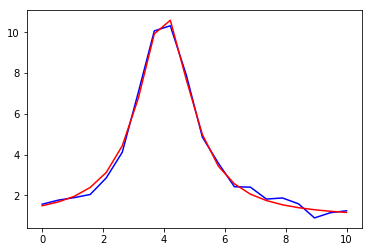

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(t, a1, a2, a3, a4):
    return a1+a2/(a3+(t-a4)**2)

xdata = np.linspace(0, 10, 20)
y = func(xdata, 1, 10, 1, 4)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.show()

[   8.70589402   42.10001551  400.           90.02564658  126.95109166]


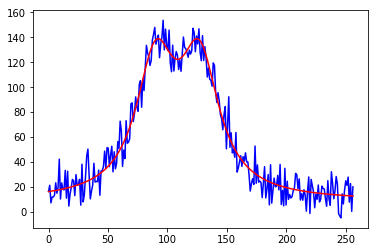

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ndata:=256; 
# f1:=t->subs({a=10,b=40000,c=380,d=128},a+b/(c+(t-d)^2) );
# f2:=t->subs({a=10,b=40000,c=380,e=90},a+b/(c+(t-e)^2) );

def func(t, a1, a2, a3, a4, a5):
    return a1+a2*1000/(a3+(t-a4)**2)+a2*1000/(a3+(t-a5)**2)

xdata = np.linspace(0, 256, 256)
y = func(xdata, 10, 40, 380, 90, 128)
y_noise = 10 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [15,50,400,100,150]))
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

print(popt)
plt.show()



In [15]:
import scipy.optimize
from numpy import *

params0=[15,50,400,100,150]

def fit_func(params,t,y):
    a1,a2,a3,a4,a5=params
    residual=y-(a1+a2*1000/(a3+(t-a4)**2)+a2*1000/(a3+(t-a5)**2))
    return residual

params, cov=scipy.optimize.leastsq(fit_func,params0,args=(xdata, ydata))
print(params)

[   8.06534811   44.0829106   423.83792773   90.01430296  126.94177586]


In [16]:
?curve_fit

# Gauss-Newton法に関するメモ



このGauss-Newton法と呼ばれる非線形最小二乗法は線形問題から拡張した方法として論理的に簡明であり，広く使われている．しかし，収束性は高くなく，むしろ発散しやすいので注意が必要．2次の項を無視するのでなく，うまく見積もる方法を用いたのがLevenberg-Marquardt法である．明快な解説がNumerical Recipes in C(Ｃ 言語による数値計算のレシピ）WilliamH.Press 他著，技術評論社1993にある．




# 課題



1.  一山ピークへのフィット

以下の256個のデータ
```maple
> ndata:=256; f1:=t->subs({a1=10,a2=40000,a3=380,a4=128},a1+a2/(a3+(t-a4)^2) );
> T:=[seq(f1(i)*(0.6+0.8*evalf(rand()/10^12)),i=1..ndata)]:
> f:=t->a1+a2/(a3+(t-a4)^2);
```
で近似したときのパラメータa1,a2,a3,a4を求めよ．ただし，パラメータの初期値は，ある程度近い値にしないと収束しない．
1.  二山ピークのフィット
以下のように作成したデータ
```maple
> ndata:=256; f1:=t->subs({a=10,b=40000,c=380,d=128},a+b/(c+(t-d)^2) );
> f2:=t->subs({a=10,b=40000,c=380,e=90},a+b/(c+(t-e)^2) );
> T:=[seq((f1(i)+f2(i))*(0.6+0.2*evalf(rand()/10^12)),i=1..ndata)]:
```
を
```maple
> f:=t->a1+a2/(a3+(t-a4)^2)+a2/(a3+(t-a5)^2);
```
$$
f\, := \,t\mapsto {\it a1}+{\frac {{\it a2}}{{\it a3}+ \left( t-{\it a4} \right) ^{2}}}+{\frac {{\it a2}}{{\it a3}+ \left( t-{\it a5} \right) ^{2}}}
$$
で近似したときのパラメータを求めよ．
```maple
> l1:=listplot(T): display(l1);
```

![C9_NonLinearFitplot2d8.png](figs/C9_NonLinearFitplot2d8.png)






# 解答例



2. ふた山ピークへのフィット．
```maple
> restart; with(plots): with(LinearAlgebra):
> f1:=t->subs({a=10,b=40000,c=380,d=128},a+b/(c+(t-d)^2) );
> f2:=t->subs({a=10,b=40000,c=380,e=90},a+b/(c+(t-e)^2) );
> T:=[seq((f1(i)+f2(i))*(0.6+0.2*evalf(rand()/10^12)),i=1..256)]:
```
$$
{\it f1}\, := \,t\mapsto 10+40000\, \left( 380+ \left( t-128 \right) ^{2} \right) ^{-1} \notag \\
{\it f2}\, := \,t\mapsto 10+40000\, \left( 380+ \left( t-90 \right) ^{2} \right) ^{-1} \notag
$$
```maple
> l1:=listplot(T):
> f:=t->a1+a2/(a3+(t-a4)^2)+a2/(a3+(t-a5)^2); 
  nparam:=5:
```
$$
f\, := \,t\mapsto {\it a1}+{\frac {{\it a2}}{{\it a3}+ \left( t-{\it a4} \right) ^{2}}}+{\frac {{\it a2}}{{\it a3}+ \left( t-{\it a5} \right) ^{2}}}
$$
```maple
> for i from 1 to nparam do 
    dfda||i:=unapply(diff(f(x),a||i),x); 
  end do;
```
$$
{\it dfda1}\, := \,x\mapsto 1 \notag \\
{\it dfda2}\, := \,x\mapsto  \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{-1}+ \left( {\it a3}+ \left( x-{\it a5} \right) ^{2} \right) ^{-1} \notag \\
{\it dfda3}\, := \,x\mapsto -{\frac {{\it a2}}{ \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{2}}}-{\frac {{\it a2}}{ \left( {\it a3}+ \left( x-{\it a5} \right) ^{2} \right) ^{2}}} \notag \\
{\it dfda4}\, := \,x\mapsto -{\frac {{\it a2}\, \left( -2\,x+2\,{\it a4} \right) }{ \left( {\it a3}+ \left( x-{\it a4} \right) ^{2} \right) ^{2}}} \notag \\
{\it dfda5}\, := \,x\mapsto -{\frac {{\it a2}\, \left( -2\,x+2\,{\it a5} \right) }{ \left( {\it a3}+ \left( x-{\it a5} \right) ^{2} \right) ^{2}}} \notag
$$

```maple
> g1:=Vector([10,1200,10,125,90]);
```
$$
{\it g1}\, := \, \left[ \begin {array}{c} 10\\ 1200\\ 10\\ 125\\ 90\end {array} \right] 
$$
```maple
> guess1:={seq(a||i=g1[i],i=1..nparam)};
```
$$
guess1 := \{a1 = 10, a2 = 1200, a3 = 10, a4 = 125, a5 = 90\}
$$

```maple
> p1:=plot(subs(guess1,f(x)),x=1..256): 
  display(l1);
```

![C9_NonLinearFitplot2d9.png](figs/C9_NonLinearFitplot2d9.png)


```maple
> df:=Vector([seq(subs(guess1,T[i]-f(i)),i=1..256)]):
  Jac:=Matrix(1..256,1..nparam,sparse):
  for i from 1 to 256 do 
    for j from 1 to nparam do
      Jac[i,j]:=evalf(subs(guess1,dfda||j(i))); 
    end do:
  end do:
  tJac:=(MatrixInverse(Transpose(Jac).Jac)).Transpose(Jac):
  g2:=tJac.df; g1:=g1+g2;
```
$$
{\it g2}\, := \, \left[ \begin {array}{c} - 0.390553882992161205\\  1584.55290636967129\\  24.9577909601538366\\ - 0.0472041829705451138\\ - 0.00719532042503852940\end {array} \right]  \notag \\
{\it g1}\, := \, \left[ \begin {array}{c}  13.6348019182603064\\  29567.3667677707381\\  410.545681677467769\\  128.512734548828887\\  90.9223109918718678\end {array} \right] \notag
$$

```maple
> guess1:={seq(a||i=g1[i],i=1..nparam)};
  p1:=plot(subs(guess1,f(x)),x=1..256):
  display(l1,p1);
```
$$
guess1 := \{a1 = 30.251, a2 = 3854.136, a3 = 39.571, a4 = 124.800, a5 = 89.960\}
$$

![C9_NonLinearFitplot2d10.png](figs/C9_NonLinearFitplot2d10.png)

何回か繰り返せば，データ点に近づいてくるはず．
